In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("economic_index.csv")

In [6]:
df.drop(columns = ['Unnamed: 0','year', 'month'], axis = 1, inplace = True)

In [7]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


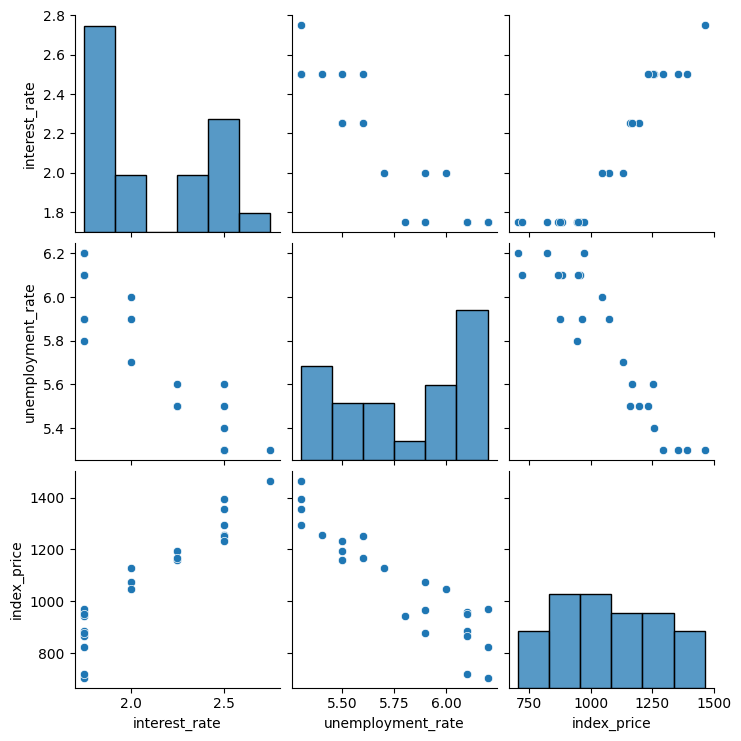

In [8]:
sns.pairplot(df)

Text(0, 0.5, 'index_price')

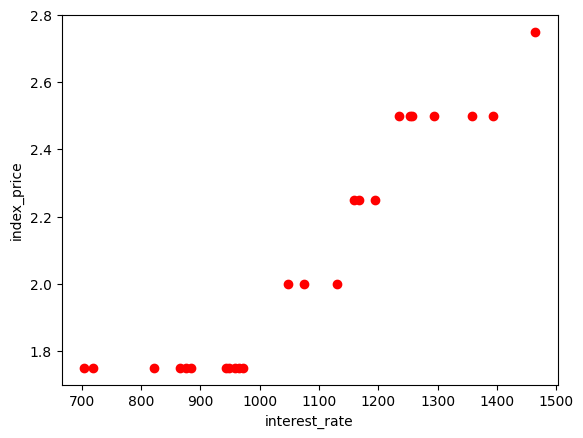

In [64]:
plt.scatter(df['index_price'], df['interest_rate'], color='r')
plt.xlabel('interest_rate')
plt.ylabel('index_price')

In [16]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [42]:
## separate independent and dependent values
X = df[['interest_rate','unemployment_rate']] ## df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
## Train test data
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [47]:
## Standardization of train data
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
## apply linear regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression().fit(X_train, y_train)
regression.score(X_train, y_train)

0.9030782287244159

In [103]:
print(f"The Coefficient  is {regression.coef_}")
print(f"The Slope/Intercept is {regression.intercept_}")

The Coefficient  is [  88.27275507 -116.25716066]
The Slope/Intercept is 1053.4444444444443


<Axes: xlabel='interest_rate', ylabel='index_price'>

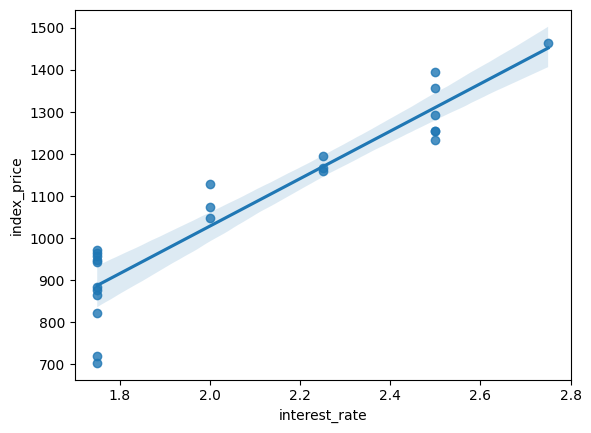

In [88]:
sns.regplot(x= df['interest_rate'],y = df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

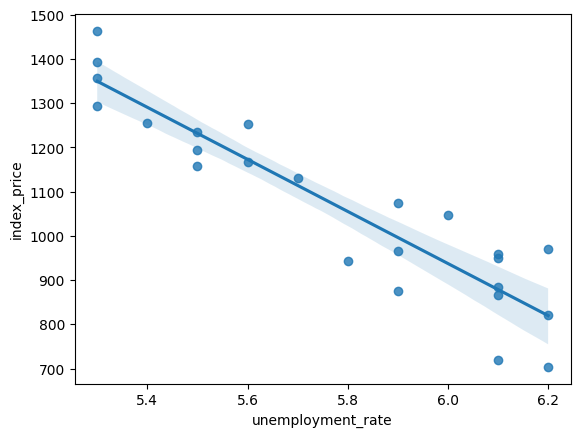

In [75]:
sns.regplot(x= df['unemployment_rate'],y = df['index_price'])

In [104]:
## predic for test data (X_test)
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [96]:
## performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The Mean Absolute Error is {mae}")
print(f"The Mean Squared Error is {mse}")
print(f"The root of Mean Squared Error is {rmse}")

The Mean Absolute Error is 73.80444932337097
The Mean Squared Error is 8108.567426306604
The root of Mean Squared Error is 90.04758423359621


In [106]:
# R2 and Adjusted R2

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"The R2 score is {score}")

adjusted_score = 1 - ((1-score)*(len(y_test)-1)/(len(y_test) - (X_test.shape[1]) - 1))
print(f"The Adjusted R2 score is {adjusted_score}")

The R2 score is 0.7591371539010257
The Adjusted R2 score is 0.5985619231683761


In [110]:
## cross validation
from sklearn.model_selection import cross_val_score
c_v_s = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv=3)
print(f"The Cross Validtion values are {c_v_s}")
print(f"The mean Cross Validation value is {np.mean(c_v_s)}")

The Cross Validtion values are [-4921.61331265 -7686.87497294 -5135.9962549 ]
The mean Cross Validation value is -5914.82818016239


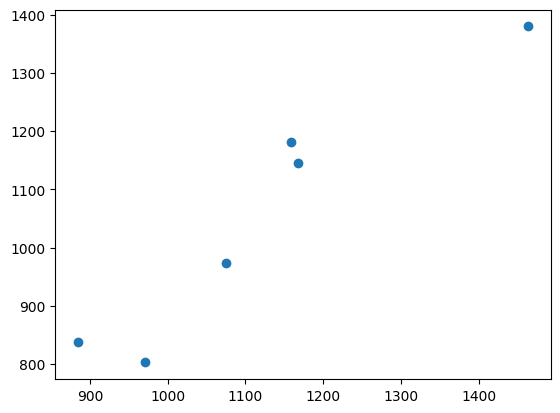

In [111]:
plt.scatter(y_test, y_pred)

In [112]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

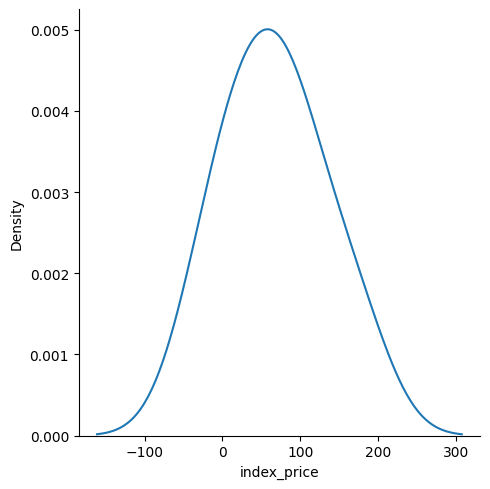

In [113]:
sns.displot(residuals, kind = 'kde')

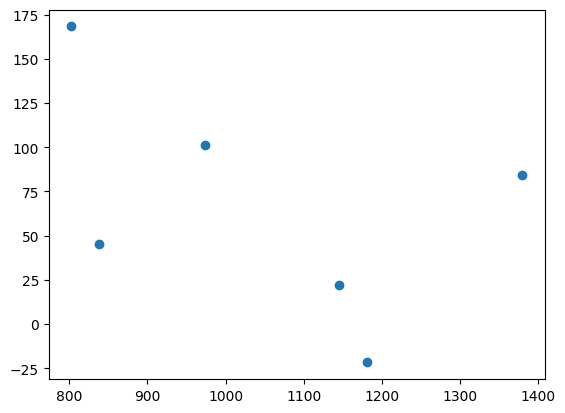

In [116]:
plt.scatter(y_pred, residuals)

In [118]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [127]:
regression.predict(scaler.transform([[1.75,6.0]]))

array([510.37880186])

In [132]:
## Ordinary Linear Regression (OLS)

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(f"The OLS prediction is {prediction}")
print(f"The OLS summary are {model.summary()}")

The OLS prediction is [ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]
The OLS summary are                                  OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                       0.754
Time:                        11:27:51   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                          

C:\Users\AW954XQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
